# Question 1: Confidence Intervals when residuals don't have constant variance. 


Assume that $y = \theta_0 \cdot x + \epsilon$ where $\epsilon \sim \mathcal{N}(0,1)$ and $y,x$ are one dimensional. 

Then we have

$$L(\theta) := \mathbb{E}\log p(y \lvert x,\theta) = \int_{-\infty}^{+\infty} \log \left(e^{-(y- \theta \cdot x)^2/\sigma(x)^2}\right)e^{-(y- \theta_0 \cdot x)^2/\sigma(x)^2} dy + g(x). $$

Note carefully that $\theta \neq \theta_0$ here. 

Rewriting the above we have

$$L(\theta) = - \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}\frac{(y- \theta \cdot x)^2}{\sigma(x)^2}e^{-(y- \theta_0 \cdot x)^2/\sigma(x)^2} dy\; q(x) dx.$$


Thus we have

$$L'(\theta) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}\frac{(y - \theta \cdot x)}{\sigma(x)^2} x e^{-(y- \theta_0 \cdot x)^2/\sigma(x)^2} dy \;q(x) dx.$$

Finally,

$$L''(\theta) = -\int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} \frac{x^2}{\sigma(x)^2} e^{-(y- \theta_0 \cdot x)^2/\sigma(x)^2} dy\; q(x) dx$$

$$ = -\int_{-\infty}^{+\infty}\frac{x^2}{\sigma(x)^2\int_{-\infty}^{+\infty} } e^{-(y- \theta_0 \cdot x)^2/\sigma(x)^2} dy\; q(x) dx$$

$$ = -\int_{-\infty}^{+\infty}\frac{x^2}{\sigma(x)^2} q(x) dx. $$




Now in the case that $\sigma(x) \equiv \sigma$ is a constant for all $x$, we have

$$  L''(\theta) = - \frac{1}{\sigma^2} \int_{-\infty}^{+\infty} x^2 q(x) dx \approx -\frac{1}{\sigma^2} x^Tx,$$


where $x = [x_1,x_2,\cdots,x_n]$ are your data points.
When $\sigma(x)$ is not constant, we have 

$$L''(\theta) = -  \int_{-\infty}^{+\infty} \frac{x^2}{\sigma(x)^2} q(x) dx \approx -x^TWx,$$

where $W$ is a diagonal matrix with $W_{i,i} = \frac{1}{\sigma_i^2}$. 

We define

$$I(\theta_0) := L''(\theta_0)$$

Then we have 

$$ \hat \theta_n =  \theta_0 \pm  \frac{\lambda_{\alpha}}{\sqrt{-I(\theta_0)}} $$

**Confidence bounds:**

**Case 1:** $\sigma(x) \equiv \sigma$ a constant. 

Then we have with probability $1-\alpha$:

$$ \hat \theta_n =  \theta_0 \pm  \frac{\lambda_{\alpha}\sigma}{\sqrt{x^T \cdot x}} ,$$

where $\lambda_{\alpha}$ is the $1-\alpha$ critical value. 

**Case 2:** $\sigma(x)$ not a constant. 
Then 
$$ \hat \theta_n =  \theta_0 \pm  \frac{\lambda_{\alpha}}{\sqrt{x^T W x}} $$

$$L_n'(\hat \theta_n) = L_n'(\theta_0) + L_n''(\theta_0)(\hat \theta_n-\theta_0)$$

$$ \Rightarrow \hat\theta_n - \theta_0 = -\frac{L_n'(\theta_0)}{L_n''(\theta_0)}$$

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import pylab as plt
import seaborn
import numpy.random as nprnd
import random


%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [155]:
x = np.random.uniform(0,10,1000)
y = 5*x + np.random.normal(0,0.5,1000)

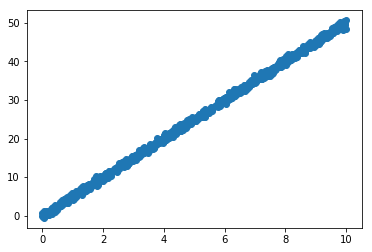

In [156]:
plt.scatter(x,y)

In [157]:
residuals = [np.random.normal(0,4,1)[0] if s < 4 or s > 6 else np.random.normal(0,100,1)[0] for s in x]
y_2 = 5*x + residuals

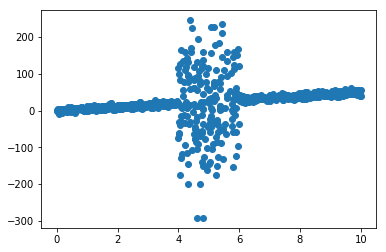

In [158]:
plt.scatter(x,y_2)

$ \alpha_1, \alpha_2, \alpha_3, \alpha_4 \geq 0 $

Incorrect fisher information: 0.010683301662
Correct fisher information: 0.0270584537413


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


<Figure size 864x864 with 0 Axes>

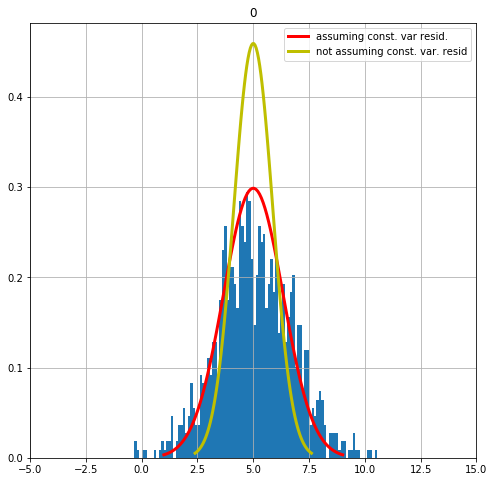

In [232]:
betas = []
jump=809
iterations = 1000
num_points = 1000
x = np.random.uniform(0,10,num_points)
y = 5*x + np.random.normal(0,0.5,num_points)
for k in range(iterations):
    residuals = [np.random.normal(0,4,1)[0] if s < 4 or s > 6 else np.random.normal(0,jump,1)[0] for s in x]
    y_2 = 5*x + residuals
    Ainv = 1.0/x.T.dot(x)
    betahat = x.T.dot(y_2)*Ainv
    betas.append(betahat)
plt.figure(figsize=(12,12))
    
pd.DataFrame(betas).hist(normed=True,figsize=(8,8),bins=100)

resid_variance = np.sum([s**2 for s in residuals])/len(x)
I1 = x.dot(x)/resid_variance
I2 = np.sum([(s*s)/16.0 if s < 4 or s > 6 else (s*s)/(jump**2) for s in x])/len(x)

plt.xlim([-5,15])
var1 = 1.0/np.sqrt(I1)
var2 = 1.0/np.sqrt(I2)   

mu = 5
variance = var1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),label='assuming const. var resid.',color='r',linewidth=3)
beta_95 = [b for b in betas if (b <= 5 - 1.96*sigma) or (b >= 5 + 1.96*sigma) ]
print ("Incorrect fisher information: {0}".format(float(np.sum(beta_95)*0.0855014)/np.sum(betas)))

#pd.DataFrame(beta_95).hist(bins=100,color='g',alpha=0.5,normed=True)

mu = 5
variance = var2
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
beta_95 = [b for b in betas if (b <= 5 - 1.96*sigma) or (b >= 5 + 1.96*sigma) ]
print ("Correct fisher information: {0}".format(float(np.sum(beta_95)*0.0855014)/np.sum(betas)))

plt.plot(x,mlab.normpdf(x, mu, sigma),label='not assuming const. var. resid',color='y',linewidth=3)
plt.legend(loc=1)
plt.show()

## Question 2:  Why does correlation affect stability? 

Let 

$$ F(\beta) = \|\mathbf{y} - \mathbf{X}\beta\|^2,$$

where $\beta = (\beta_1, \beta_2)$. $X \in \mathbb{R}^{n \times 2}$, $y \in \mathbb{R}^n$. 

Then we have

$$ F(\beta) = F(\beta_0) + \nabla F(\beta_0)\cdot (\beta - \beta_0) + (\beta-\beta_0)^T D^2F(\beta_0)(\beta-\beta_0) + O\left(|\beta-\beta_0|^3\right)$$

Recalling that $\nabla F(\beta_0) = 2 \langle \mathbf{y} - \mathbf{X}\beta_0, -\mathbf{X} \rangle$ so that $$D^2F(\beta_0) = \mathbf{X}^T \mathbf{X},$$

and choosing $\beta_0$ to be the minimum of $F(\beta)$ so that $\nabla F(\beta_0) = 0$, we have

$$F(\beta) - F(\beta_0) \sim (\beta-\beta_0)^T \mathbf{X}^T \mathbf{X}(\beta-\beta_0),$$

when $|\beta-\beta_0|$ is small. Thus our problem is locally a quadratic one. Let's consider an example to illustrate the ideas. 

Let's assume our true rule is


$$ y = 5X_0 + + 10X_1+ \epsilon, $$

where $\mathbf{X} = [X_0, X_1]$ and $X_0, X_1 \in \mathbb{R}^n$. Let's see how convergence is affected when $X_0$ and $X_1$ are correlated. 

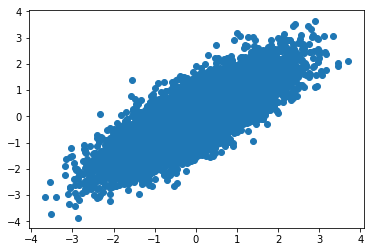

In [4]:
mean = (0,0)
corr = 0.8
cov = [[1, corr],[corr,1 ]]
X = np.random.multivariate_normal(mean, cov, 10000)
plt.scatter(X[:,0],X[:,1])

### Plot the eigenvalues for different levels of correlation

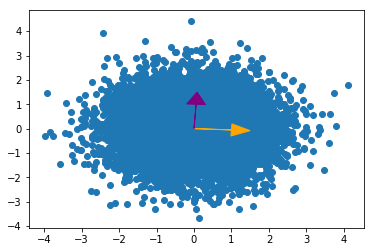

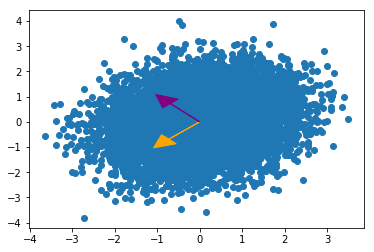

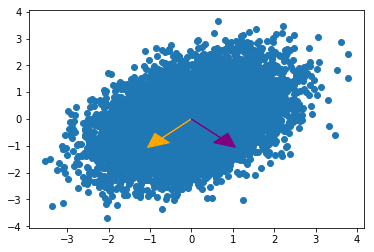

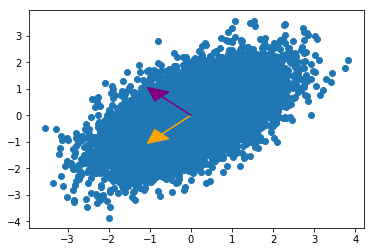

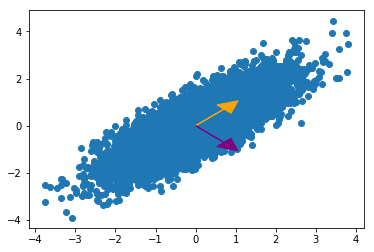

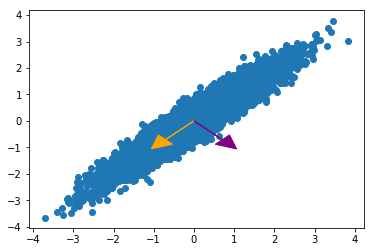

In [37]:
import numpy as np
from sklearn.decomposition import PCA

mean = (0,0)
for corr in [0.0,0.2,0.4,0.6,0.8,0.95]:

    cov = [[1, corr],[corr,1 ]]
    X = np.random.multivariate_normal(mean, cov, 10000)

    pca = PCA(n_components=2)
    pca.fit(X)
    pca.components_
    v1,v2 = pca.components_
    plt.scatter(X[:,0],X[:,1])
    plt.arrow(0, 0, *v1, head_width=0.5, head_length=0.5,color='orange')
    plt.arrow(0, 0, *v2, head_width=0.5, head_length=0.5,color='purple')
    plt.show()

### Gradient Flow Function

Let's first consider the case with 0 correlation. 

In [110]:
corr = 0.0
cov = [[1, corr],[corr,1 ]]
X = np.random.multivariate_normal(mean, cov, 10000)
y = 5*X[:,0] + 10*X[:,1] + np.random.normal(0,0.5,10000)

def grad(X, y, beta):
    df = 2*(-X.T.dot(y) + X.T.dot(X).dot(beta))
    return df
def gradflow(X,y,beta0,nu=0.00001):
    beta = beta0
    for k in range(100):
         beta = beta - nu*grad(X,y,beta)
    return beta
def gradflow_full(X,y,beta0,nu=0.00001):
    beta = beta0
    gradflow=[]
    for k in range(100):
         beta = beta - nu*grad(X,y,beta)
         gradflow.append(beta)
    return gradflow
gradflow(X,y,[3,3])

array([5.00420042, 9.9867889 ])

Let's see what happens with different levels of correlation.

### Coefficients vs correlation

Notice that as we increase the degree of correlation, our coefficients start to diverge from the "truth". This is due to the flat 
regions in the space as will be seen below. 

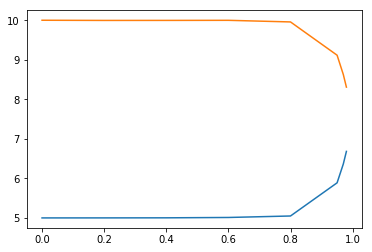

In [112]:
betas = []
corrs=[0.0,0.2,0.4,0.6,0.8,0.95,0.97,0.98]
for corr in corrs:
    cov = [[1, corr],[corr,1 ]]
    X = np.random.multivariate_normal(mean, cov, 10000)
    y = 5*X[:,0] + 10*X[:,1] + np.random.normal(0,0.5,10000)
    beta_solution = gradflow(X,y,[3,3])
    betas.append(beta_solution)
plt.plot(corrs,betas)

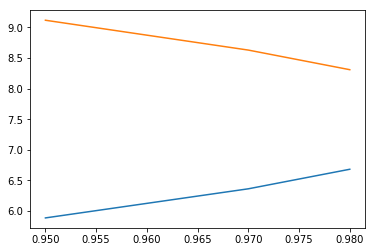

In [114]:
plt.plot(corrs[-3:],betas[-3:])

### Visualizing gradient descent. 

The contours below represent the level sets of $F(\beta) - F(\beta_0)$. Notice that as the correlation increases, we stretch 
one of the axes. Imagine dropping a very small ball into a large elliptical bowl. If you make one of the sides extremely long and narrow,
the ball will have a very hard time finding the bottom and will roll back and forth along the stretched out direction. This is what is happening here. 

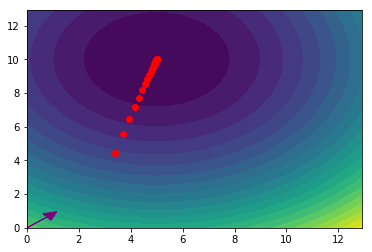

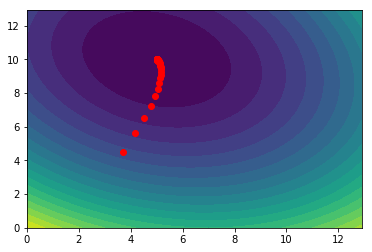

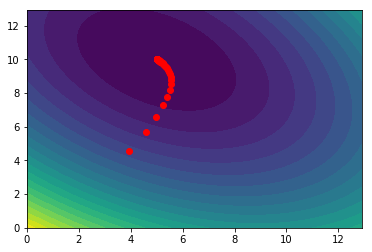

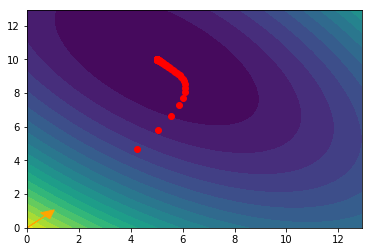

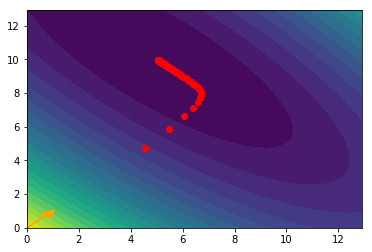

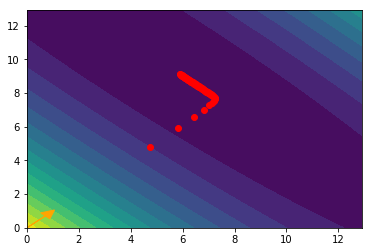

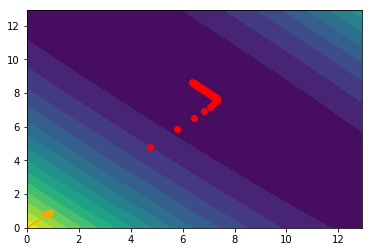

In [122]:
import numpy as np
from sklearn.decomposition import PCA

mean = (0,0)
for corr in [0.0,0.2,0.4,0.6,0.8,0.95,0.97]:

    cov = [[1, corr],[corr,1 ]]
    X = np.random.multivariate_normal(mean, cov, 10000)
    y = 5*X[:,0] + 10*X[:,1] + np.random.normal(0,0.5,10000)

    pca = PCA(n_components=2)
    pca.fit(X)
    pca.components_
    v1,v2 = pca.components_
    #plt.scatter(X[:,0],X[:,1])
    beta_solution = np.squeeze(gradflow_full(X,y,[3,3]))
    
    a = np.arange(0,13, 0.1)
    b = np.arange(0,13, 0.1)
    xx, yy = np.meshgrid(a,b, sparse=True)
    z =  ((xx-5)**2 +2*corr*(xx-5)*(yy-10)+ (yy-10)**2)
    h = plt.contourf(a,b,z,20)
    plt.scatter(beta_solution[:,0],beta_solution[:,1],color='r')
    plt.arrow(0, 0, *v1, head_width=0.5, head_length=0.5,color='orange')
    plt.arrow(0, 0, *v2, head_width=0.5, head_length=0.5,color='purple')
    
    plt.show()